[(6.321240922507114, 0.0), (0.0, 4.581050471006185), (9.007763204212022, 10.0), (10.0, 6.834615439539762), (6.321240922507114, 0.0)]


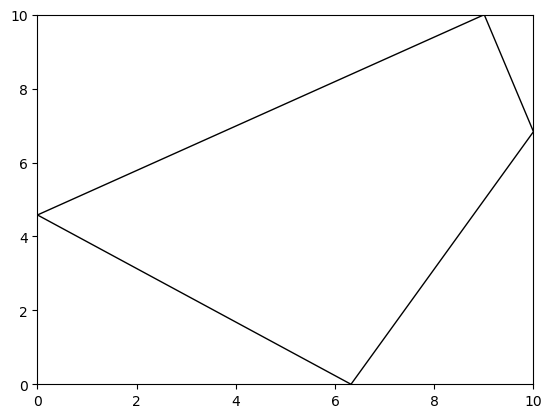

In [5]:
import random
from shapely.geometry import Polygon
from shapely.ops import triangulate, unary_union
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def generate_random_polygon(num_points, bounds):
    """Generate a random polygon with the specified number of points within the given bounds."""
    min_x, min_y, max_x, max_y = bounds
    # points = [(random.uniform(min_x, max_x), random.uniform(min_y, max_y)) for _ in range(num_points)]
    # Generate random points on each side of the bounding box
    points = [(random.uniform(min_x, max_x), min_y),     # bottom side
              (random.uniform(min_x, max_x), max_y),     # top side
              (min_x, random.uniform(min_y, max_y)),     # left side
              (max_x, random.uniform(min_y, max_y)),     # right side
            ]
    # Add the remaining points
    for _ in range(num_points - 4):
        points.append((random.uniform(min_x, max_x), random.uniform(min_y, max_y)))

    polygon = Polygon(points)
    triangles = list(triangulate(polygon))
    # Merge triangles into a single polygon
    polygon = unary_union(triangles)
    # Convert the polygon to a list of (x, y) coordinates
    polygon = list(polygon.exterior.coords)
    return polygon

# Define the bounds for the random polygon
bounds = (0, 0, 10, 10)  # (min_x, min_y, max_x, max_y)

# Generate a random polygon with 5 points within the specified bounds
random_polygon = generate_random_polygon(6, bounds)

print(random_polygon)

# Plot the random polygon

fig, ax = plt.subplots()
ax.set_xlim(bounds[0], bounds[2])
ax.set_ylim(bounds[1], bounds[3])
ax.add_patch(patches.Polygon(random_polygon, fill=False, edgecolor='black'))
plt.show()

[(6.117359597567447, 0.0), (0.0, 10.0), (5.335237108915928, 9.982511402548168), (10.0, 7.530088934269213), (6.117359597567447, 0.0)]


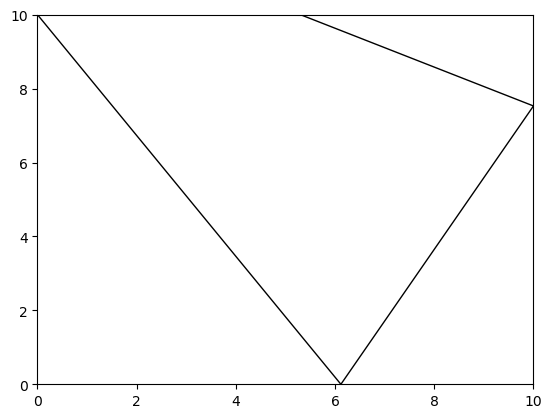

In [6]:
# The seconde version of generate_random_polygon

def generate_random_polygon(min_x, min_y, max_x, max_y, num_points):
    
    points = [(random.uniform(min_x, max_x), random.uniform(min_y, max_y)) for _ in range(num_points)]
    # Get two random indices different from each other
    i, j = random.sample(range(num_points), 2)
    points[i] = (min_x, points[i][0])
    points[j] = (max_x, points[j][0])
    i, j = random.sample(range(num_points), 2)
    points[i] = (points[i][0], min_y)
    points[j] = (points[j][0], max_y)

    polygon = Polygon(points)
    triangles = list(triangulate(polygon))
    # Merge triangles into a single polygon
    polygon = unary_union(triangles)
    # Convert the polygon to a list of (x, y) coordinates
    polygon = list(polygon.exterior.coords)
    return polygon

points = [(random.uniform(10, 20), random.uniform(-10, -5)) for _ in range(5)]

# Generate a random polygon with 5 points within the specified bounds
random_polygon = generate_random_polygon(bounds[0],bounds[1],bounds[2],bounds[3], 6)

print(random_polygon)

# Plot the random polygon

fig, ax = plt.subplots()
ax.set_xlim(bounds[0], bounds[2])
ax.set_ylim(bounds[1], bounds[3])
ax.add_patch(patches.Polygon(random_polygon, fill=False, edgecolor='black'))
plt.show()

[(5.151108948386389, 2.2637141358549586), (9.91253593681561, 0.0), (5.993022850721714, 6.841359121209953), (10.0, 10.0), (1.268253740412436, 8.613580041537398), (0.0, 7.77770203876086), (5.151108948386389, 2.2637141358549586)]


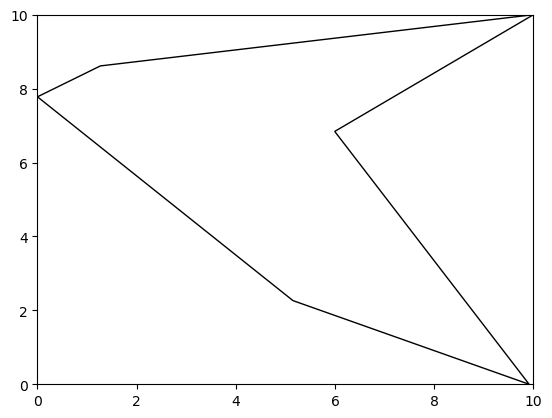

In [58]:
# The third version of generate_random_polygon

def generate_random_polygon(min_x, min_y, max_x, max_y, num_points):
    
    # Do while loop to make sure the polygon is not concave

    while True:
        points = [(random.uniform(min_x, max_x), random.uniform(min_y, max_y)) for _ in range(num_points)]
        # Get two random indices different from each other
        i, j = random.sample(range(num_points), 2)
        points[i] = (min_x, points[i][0])
        points[j] = (max_x, points[j][0])
        i, j = random.sample(range(num_points), 2)
        points[i] = (points[i][0], min_y)
        points[j] = (points[j][0], max_y)

        polygon = Polygon(points)
        # Check if the polygon is correct 
        if polygon.is_valid:
            break

    polygon = list(polygon.exterior.coords)
    return polygon

points = [(random.uniform(10, 20), random.uniform(-10, -5)) for _ in range(5)]

# Generate a random polygon with 5 points within the specified bounds
random_polygon = generate_random_polygon(bounds[0],bounds[1],bounds[2],bounds[3], 6)

print(random_polygon)

# Plot the random polygon

fig, ax = plt.subplots()
ax.set_xlim(bounds[0], bounds[2])
ax.set_ylim(bounds[1], bounds[3])
ax.add_patch(patches.Polygon(random_polygon, fill=False, edgecolor='black'))
plt.show()